In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv("Boston.csv")

In [3]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data = data.drop('Unnamed: 0', axis=1)

In [5]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.shape

(506, 14)

In [7]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


From above we can observe zn has its 25th and 50th quartile both zero, so half of the datapoints have zn as zero which suggest that it may not affect the target varibale that is medv. The zn feature is skewed and mostly zero.

Similarly the chas feature has 25, 50 and 75 are zero so nearly 5 percent of data points are zero which also suggest that it will not affect the target value.

The zn feature has very little variation and the chas which is binary feature with only few positives, so these both will not affect the target value a lot.

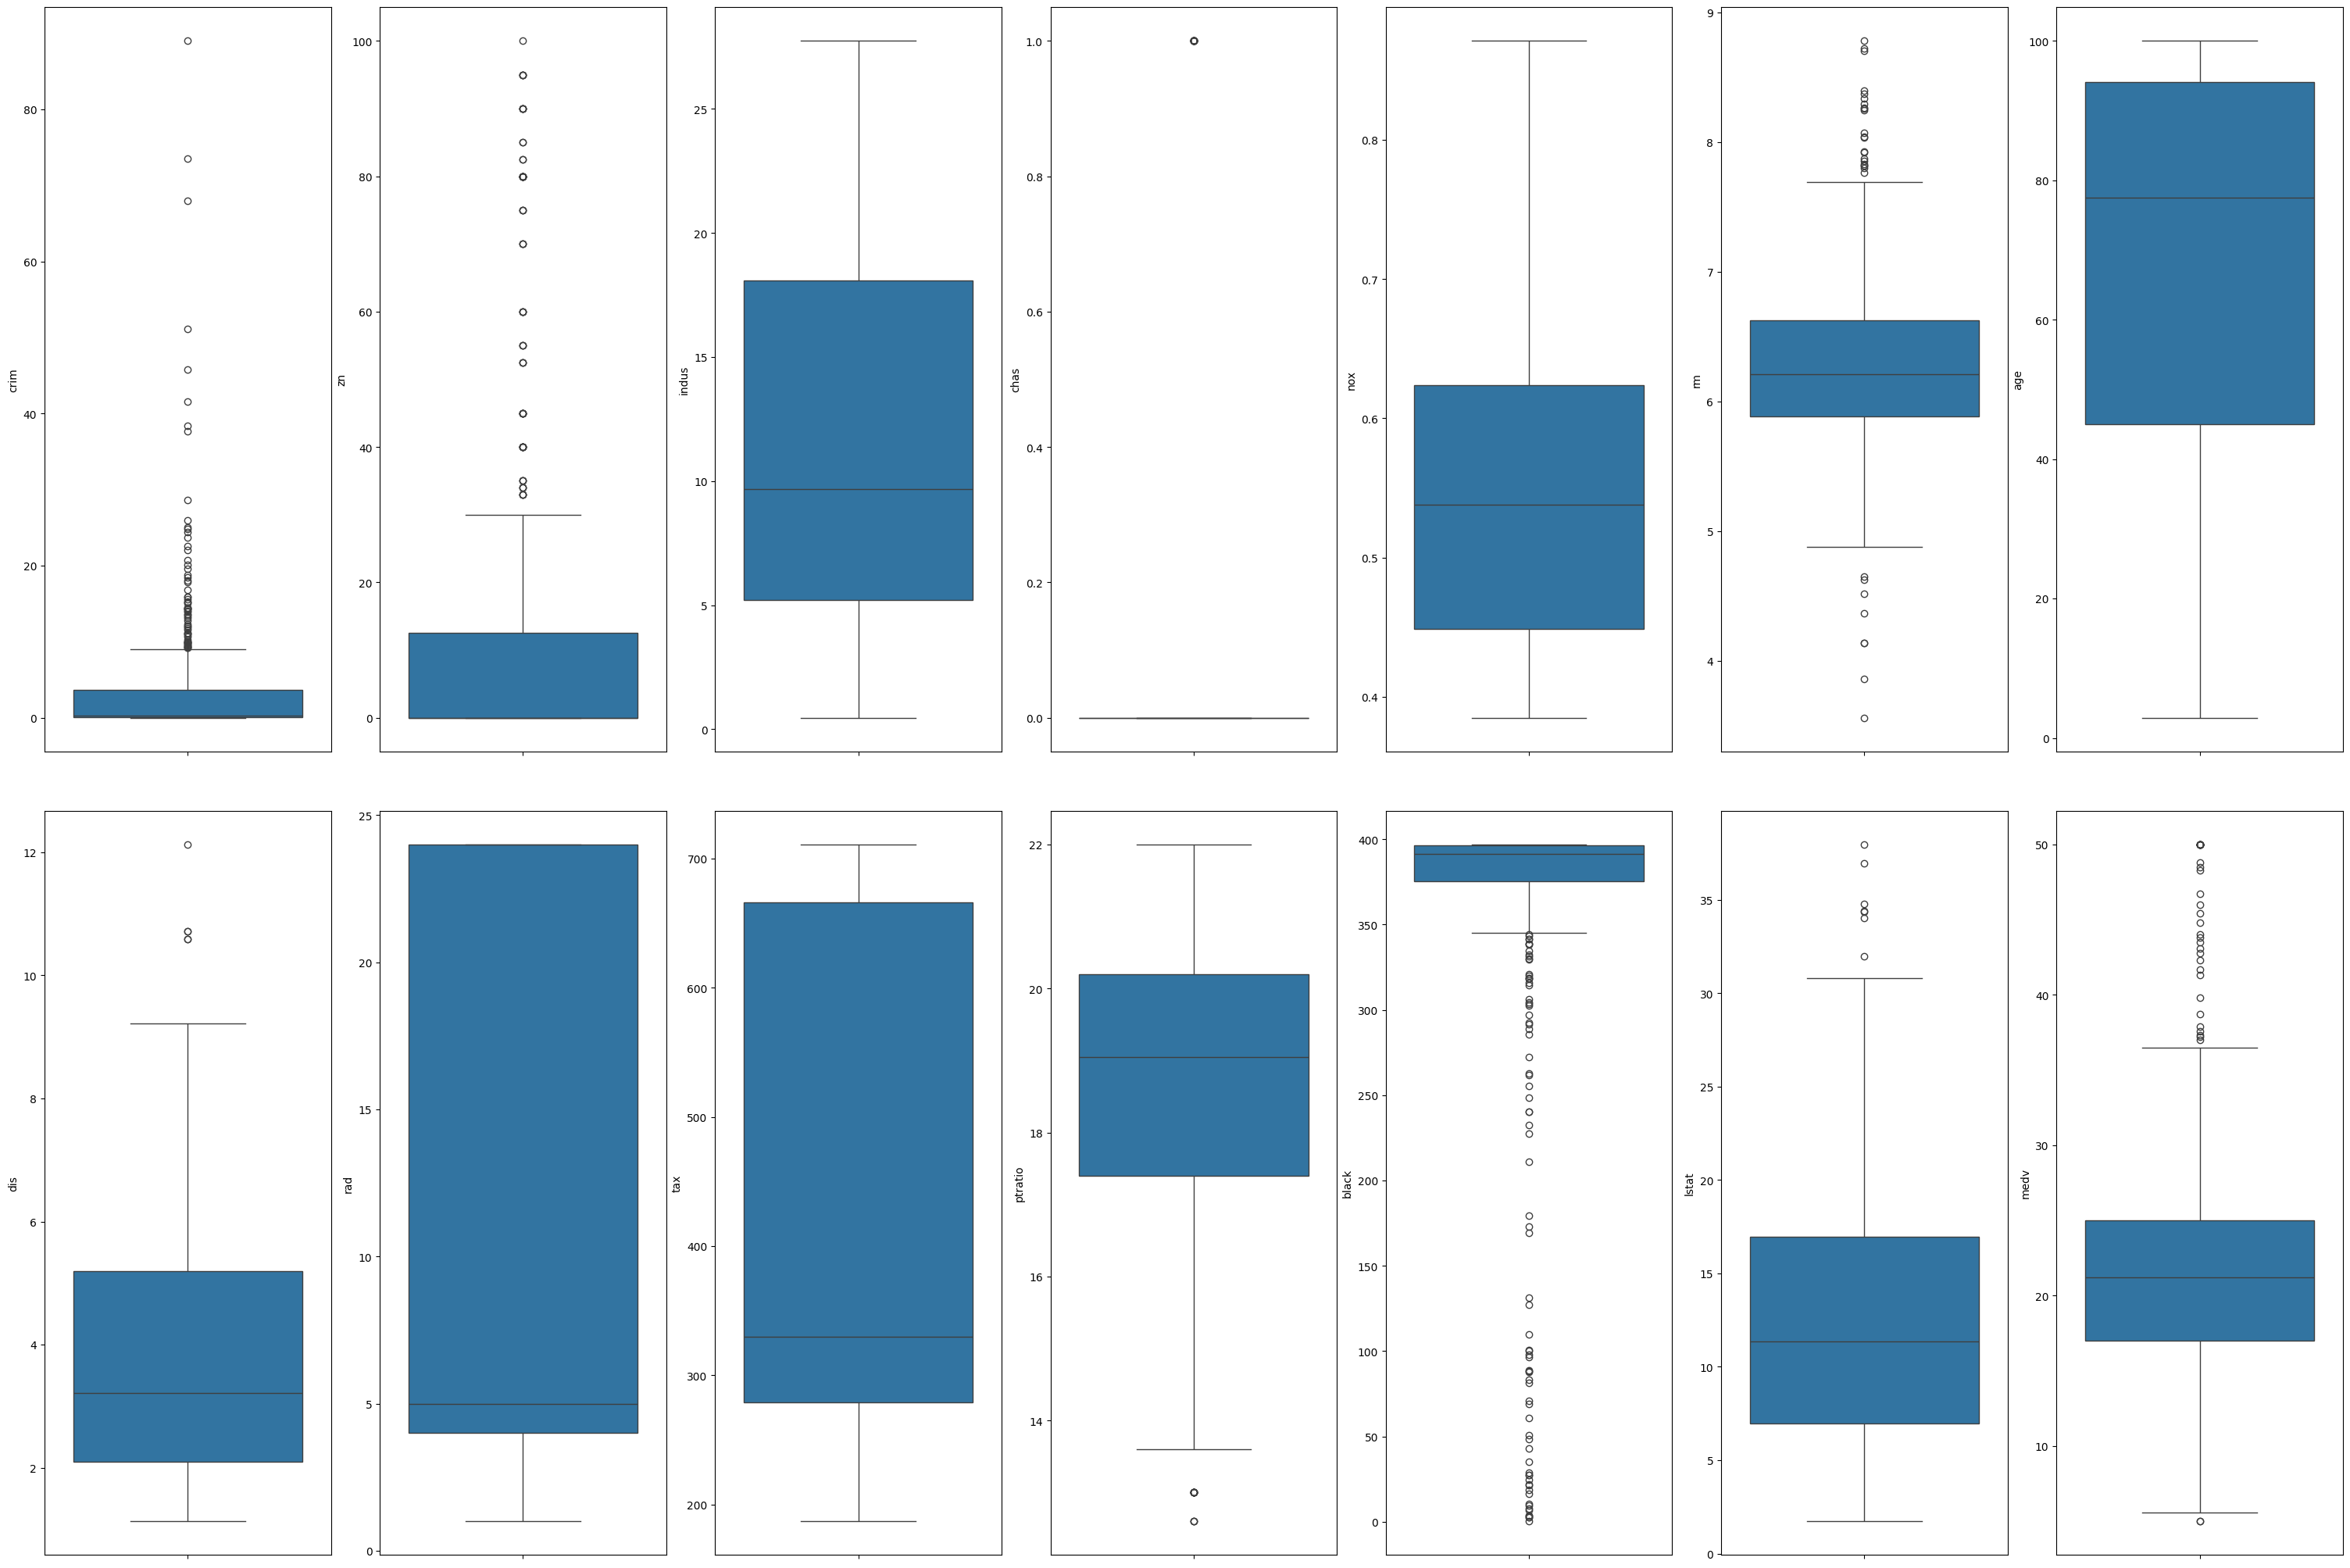

In [20]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(30, 20))
index = 0
axs = axs.flatten()

for k, v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index = index + 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

There are many outliers in many coulmns so we will be analysing them

In [25]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    vCol = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    percent = np.shape(vCol)[0] * 100 / np.shape(data)[0]
    print("%s = %.2f%%" % (k, percent))

crim = 13.04%
zn = 13.44%
indus = 0.00%
chas = 100.00%
nox = 0.00%
rm = 5.93%
age = 0.00%
dis = 0.99%
rad = 0.00%
tax = 0.00%
ptratio = 2.96%
black = 15.22%
lstat = 1.38%
medv = 7.91%


Quantile is the value below which the data falls, that is q1 is the value below which 25% of data falls and q3 is the value below which the 75% of data falls

data points below q1-1.5*iqr and data points above q3+1.5*iqr are considered as outliers